In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, explained_variance_score
from skimage.metrics import normalized_root_mse

In [21]:
dataset = pd.read_csv('Edited_Korea_Original.csv')
dataset

,Measurement date,Station code,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 00:00,102,0.006,0.068,0.002,1.3,77.0,63.0
2,2017-01-01 00:00,103,0.005,0.039,0.002,1.4,70.0,68.0
3,2017-01-01 00:00,104,0.005,0.045,0.003,0.6,73.0,46.0
4,2017-01-01 00:00,105,0.005,0.044,0.004,1.0,81.0,44.0
...,...,...,...,...,...,...,...,...
656995,2019-12-31 23:00,121,0.003,0.042,0.013,0.5,29.0,16.0
656996,2019-12-31 23:00,122,0.003,0.047,0.007,0.4,24.0,15.0
656997,2019-12-31 23:00,123,0.003,0.039,0.003,0.5,19.0,13.0
656998,2019-12-31 23:00,124,0.003,0.035,0.004,0.5,20.0,13.0


In [22]:
new_dt = dataset[['Station code', 'PM10', 'PM2.5', 'SO2', 'CO', 'NO2', 'O3']]
new_dt

,Station code,PM10,PM2.5,SO2,CO,NO2,O3
0,101,73.0,57.0,0.004,1.2,0.059,0.002
1,102,77.0,63.0,0.006,1.3,0.068,0.002
2,103,70.0,68.0,0.005,1.4,0.039,0.002
3,104,73.0,46.0,0.005,0.6,0.045,0.003
4,105,81.0,44.0,0.005,1.0,0.044,0.004
...,...,...,...,...,...,...,...
656995,121,29.0,16.0,0.003,0.5,0.042,0.013
656996,122,24.0,15.0,0.003,0.4,0.047,0.007
656997,123,19.0,13.0,0.003,0.5,0.039,0.003
656998,124,20.0,13.0,0.003,0.5,0.035,0.004


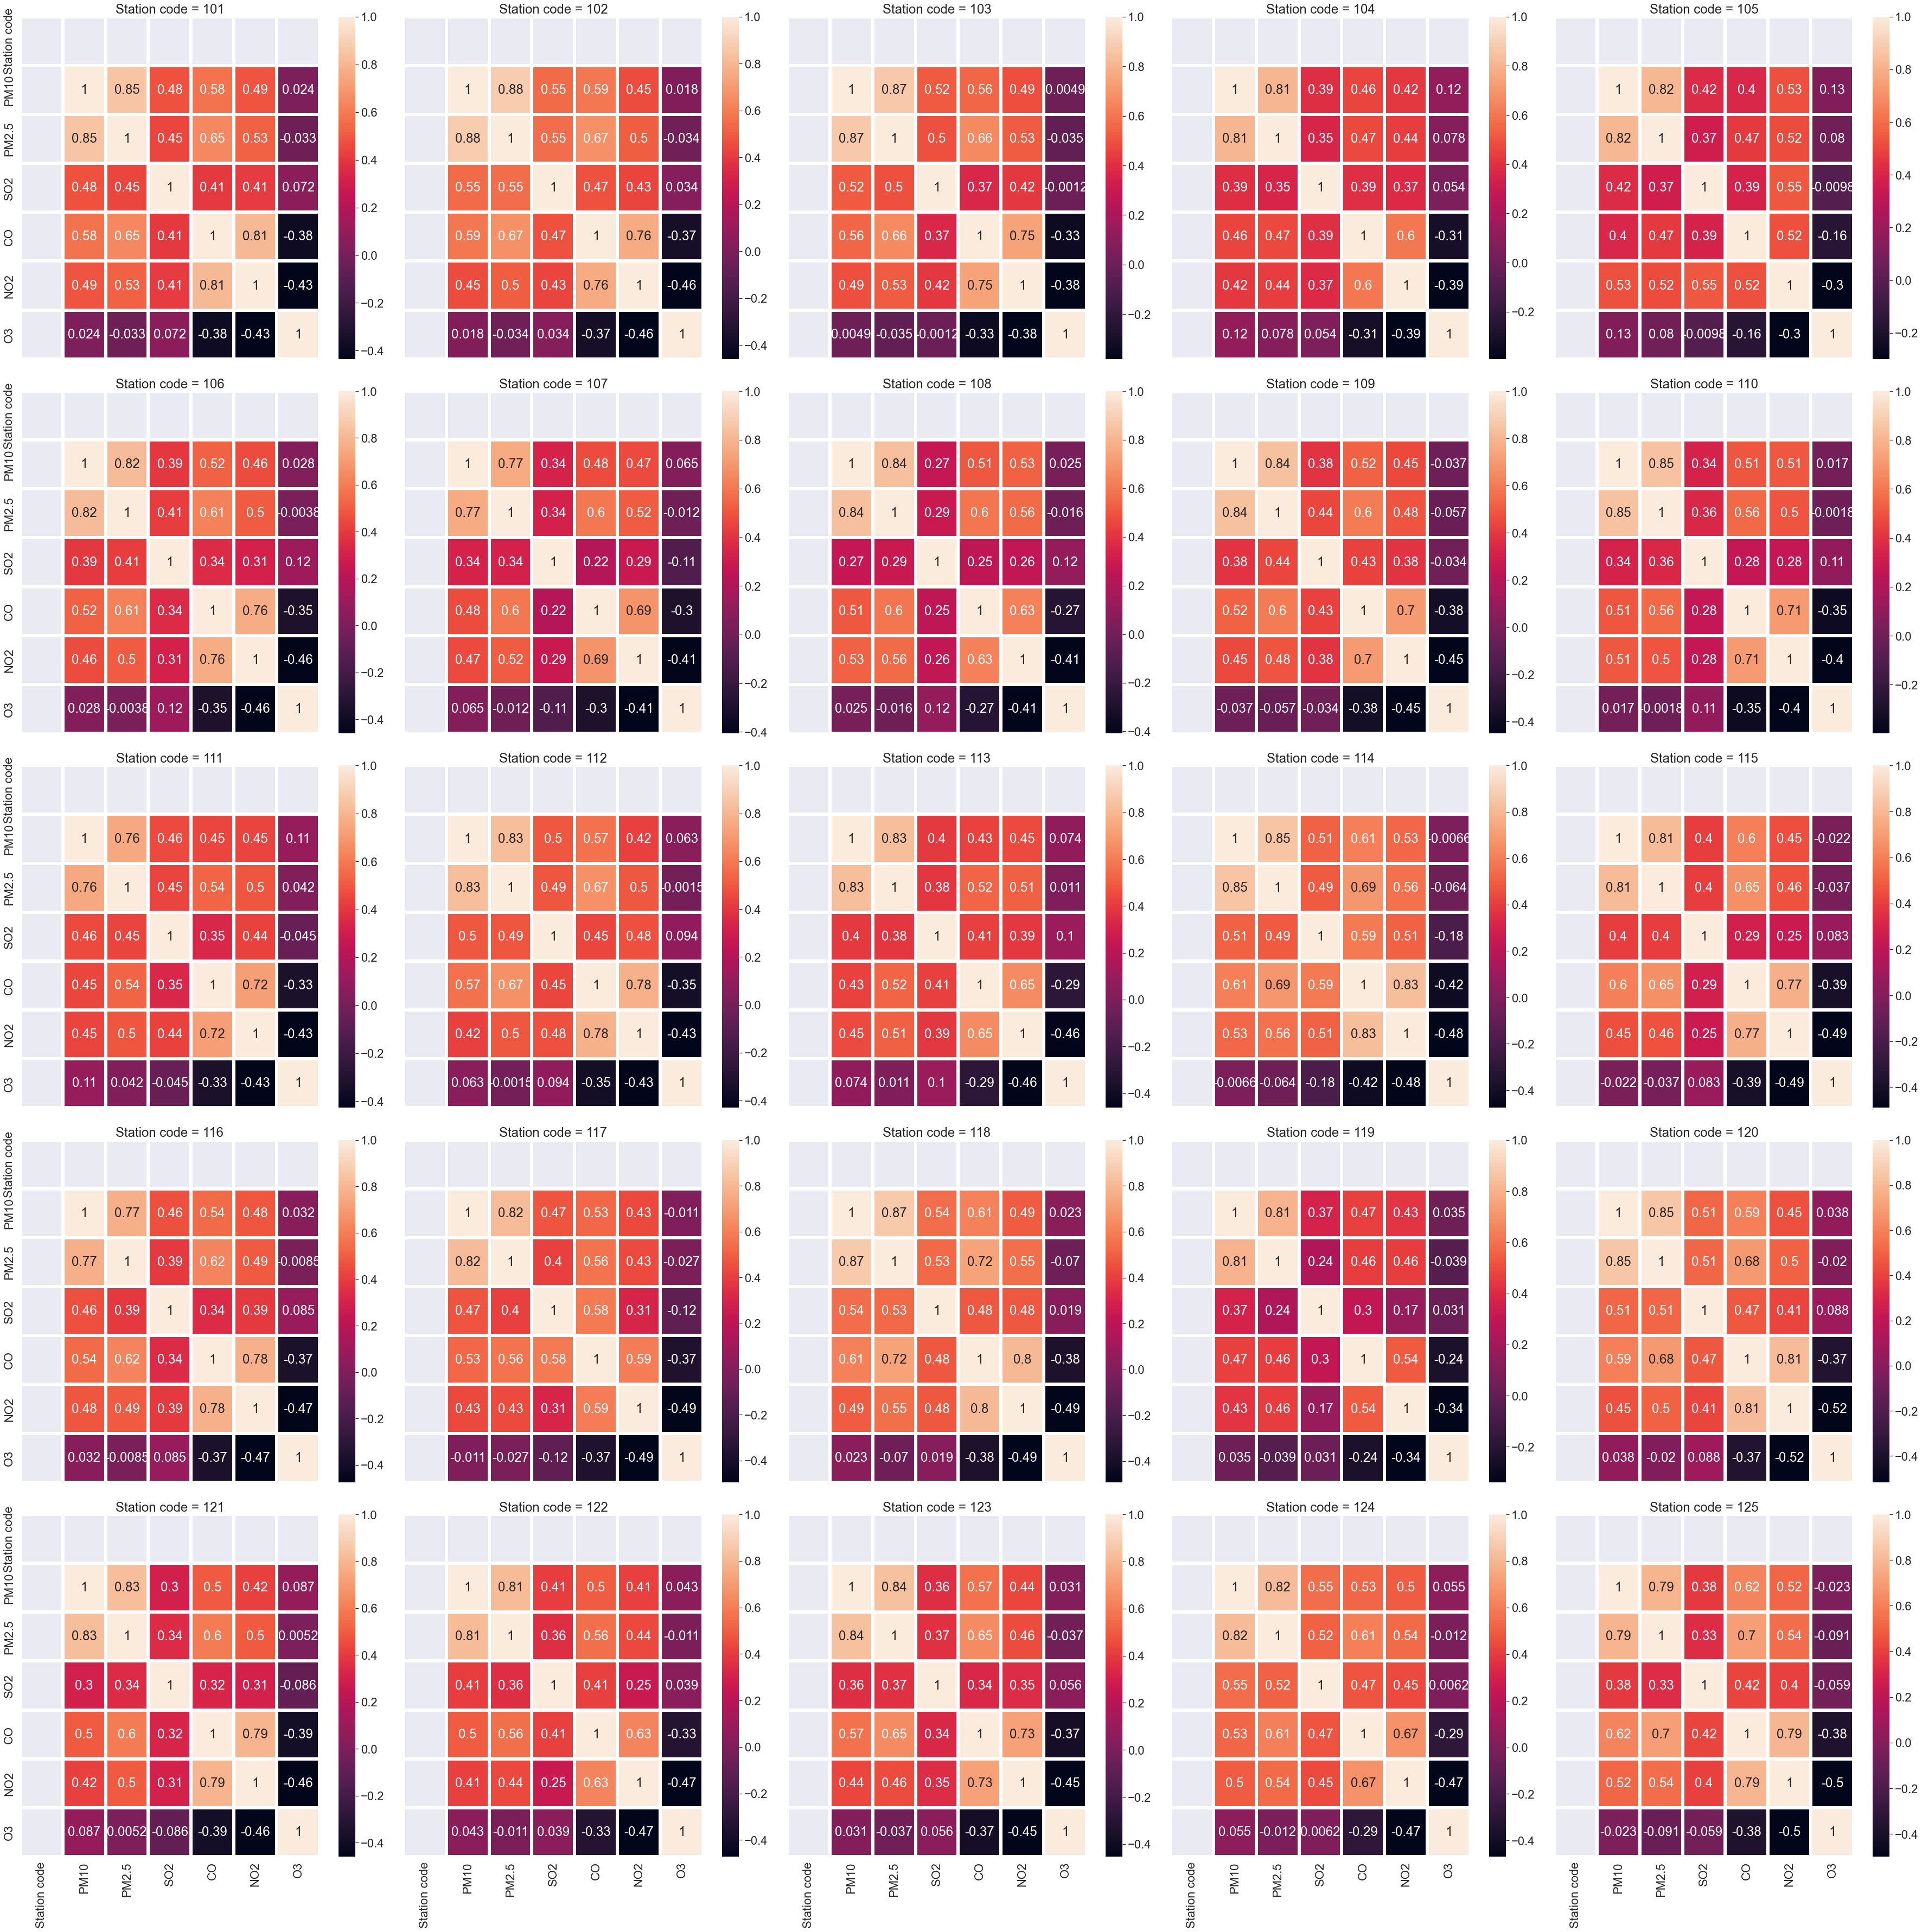

In [23]:
p = sns.FacetGrid(data=new_dt, col='Station code', col_wrap=5, height=10)
p.map_dataframe(lambda data, color: sns.heatmap(data.corr(), linewidths=5, annot=True))


In [24]:
st_nrmse = []
for i in range(101, 126):
    nrmse = []
    a = new_dt[new_dt['Station code'] == i].corr().values[1:, 1:]
    for j in range(101, 126):        
        b = new_dt[new_dt['Station code'] == j].corr().values[1:, 1:]
        nrmse.append(normalized_root_mse(a, b))
    st_nrmse.append(nrmse)


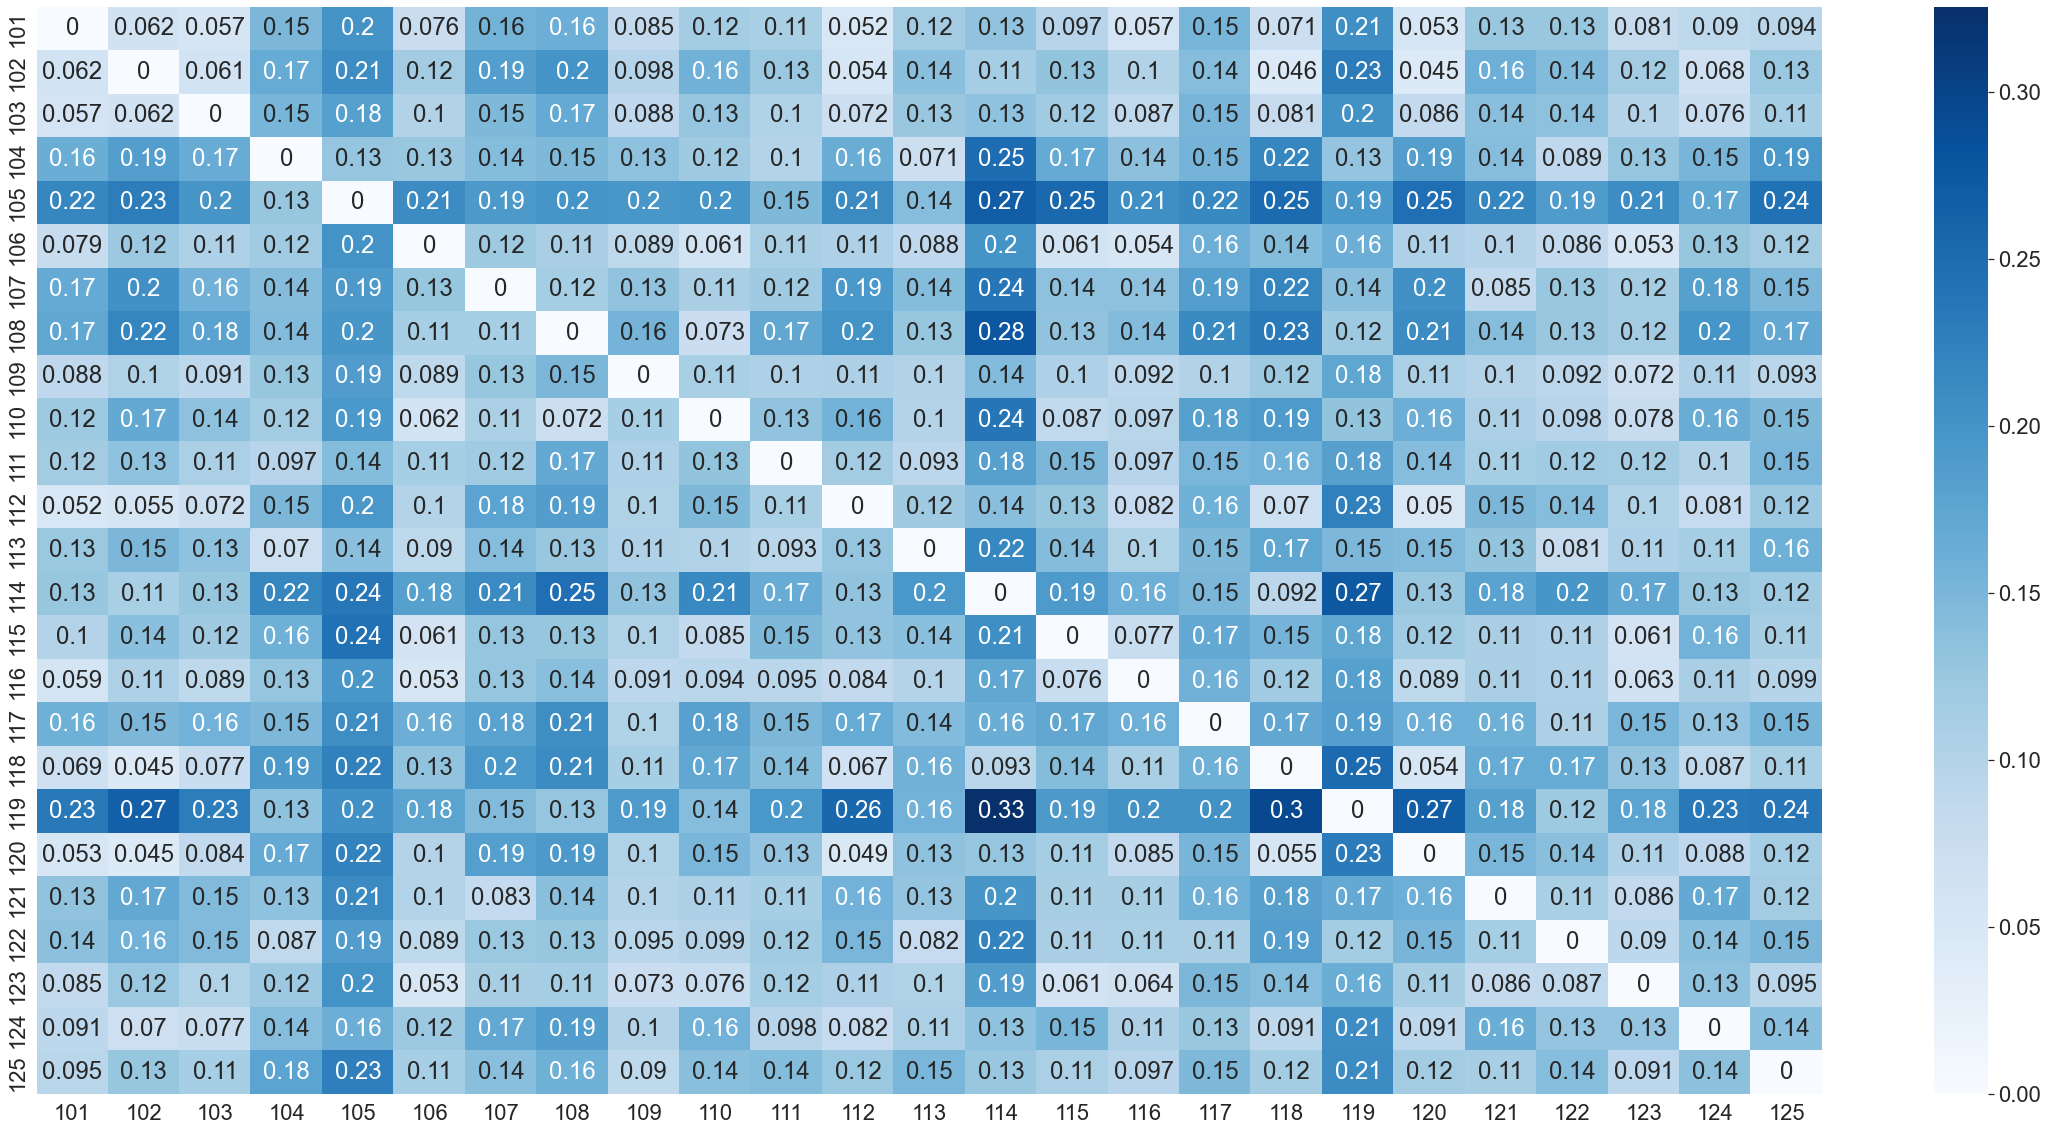

In [25]:
dt = pd.DataFrame(st_nrmse, index=range(101,126), columns=range(101,126))
plt.figure(figsize=(40,20))
sns.heatmap(dt, annot=True, cmap='Blues')